In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [6]:
# Metrics and scoring: quantifying the quality of predictions
# The sklearn.metrics module includes score functions, performance metrics and pairwise metrics and distance computations.

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [7]:
df = pd.read_csv("data.txt")

In [8]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [11]:
# Generate descriptive statistics.
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# EDA

C:\Users\Admin\AppData\Local\Temp\ipykernel_4388\1053302770.py:2: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("General Explore.png") # save as png
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


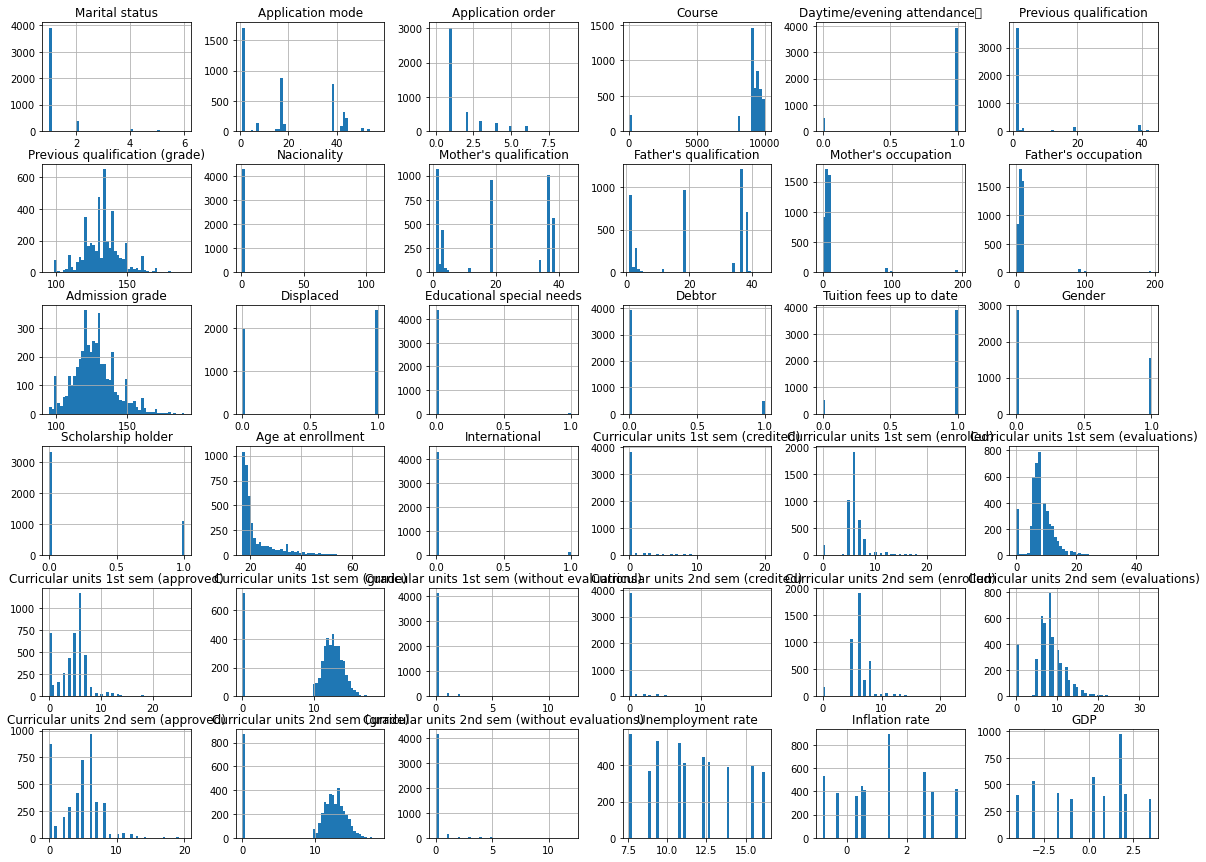

In [12]:
df[df.columns].hist(bins=50, figsize=(20,15))
plt.savefig("General Explore.png") # save as png

We can have a good enough idea of numerical features, how do they look like, their common values in a large number of houses and their distribution from above figure. We will not be discussing each feature in detail here. It would also be a good idea to see the correlation among various features.

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:660: UserWarning: Glyph 9 (	) missing from current font.
  bboxes = [l.get_window_extent() for l in labels]
C:\Users\Admin\AppData\Local\Temp\ipykernel_4388\1630930692.py:6: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig("Correlation.png") # save as png


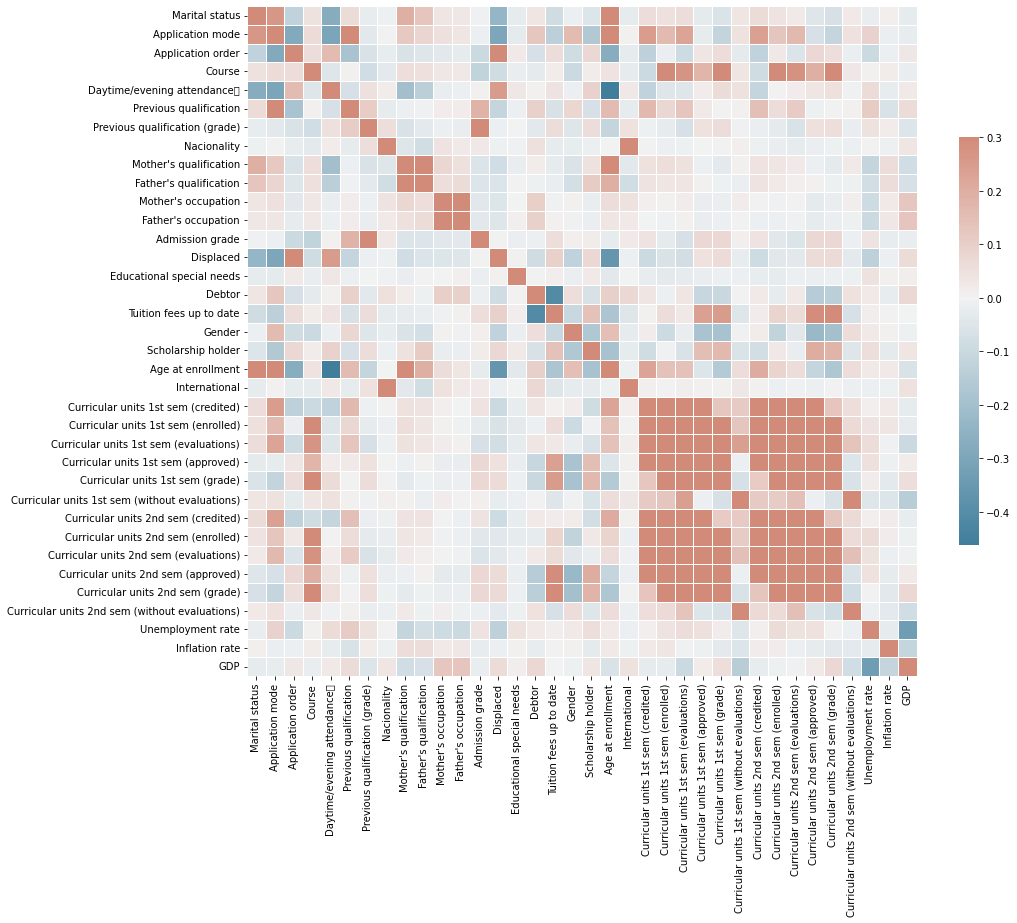

In [13]:
# Plotting a correlation matrix 
f = plt.figure(figsize=(15, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=False, cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig("Correlation.png") # save as png

We can see from correlation matrix that most features are strongly and positively correlated with eachother (the brighter the orange-ish color, the stronger the positive correlation and strong blue color denotes to strong negative correlation) and a very few are negatively coorelated. Only a few features are weakly correlated positive or negative.

<AxesSubplot:xlabel='Unemployment rate', ylabel='Count'>

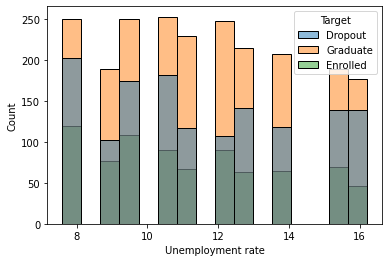

In [14]:
sns.histplot(x='Unemployment rate',data=df,hue='Target')

It is surprising to know that the the higher the unemployment is, the less likely that a student will drop out. In fact, this makes sense because if unemployment is low, which means the demand of labor is high, a job seeker has higher chance to have a job. This undermines the need of earning a degree. When unemployment is high, a job seeker is expected to be more competative to be able to have a job. 

<AxesSubplot:xlabel='Inflation rate', ylabel='Count'>

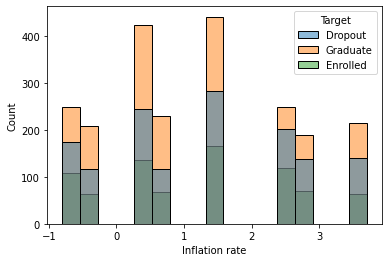

In [15]:
sns.histplot(x='Inflation rate',data=df,hue='Target')

## Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target',axis=1), df['Target'], test_size=0.2, random_state=101)

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression(max_iter=10000)

In [20]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [21]:
predictions = logmodel.predict(X_test)

In [22]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.768361581920904


              precision    recall  f1-score   support

     Dropout       0.83      0.71      0.77       285
    Enrolled       0.46      0.33      0.38       141
    Graduate       0.80      0.94      0.86       459

    accuracy                           0.77       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.77      0.75       885



[[202  36  47]
 [ 31  46  64]
 [ 10  17 432]]


**Logistic Regression performs very well on this case study**

### K-Nearst Neighbor

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
predictions = knn.predict(X_test)

In [27]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.5875706214689266


              precision    recall  f1-score   support

     Dropout       0.58      0.48      0.53       285
    Enrolled       0.30      0.37      0.33       141
    Graduate       0.69      0.72      0.70       459

    accuracy                           0.59       885
   macro avg       0.53      0.52      0.52       885
weighted avg       0.59      0.59      0.59       885



[[138  57  90]
 [ 31  52  58]
 [ 67  62 330]]


In [28]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

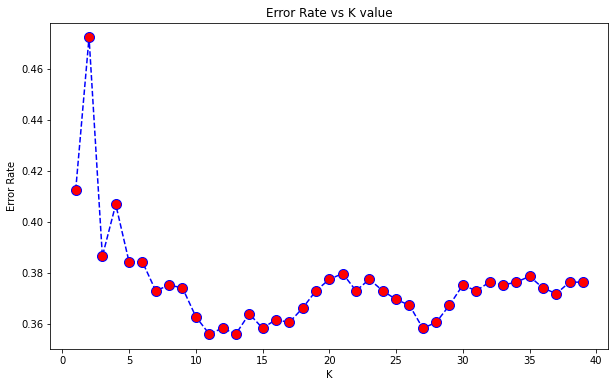

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.savefig("Error Rate vs K value.png") # save as png

In [30]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [31]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.6440677966101694


              precision    recall  f1-score   support

     Dropout       0.63      0.56      0.59       285
    Enrolled       0.41      0.26      0.31       141
    Graduate       0.69      0.81      0.75       459

    accuracy                           0.64       885
   macro avg       0.58      0.54      0.55       885
weighted avg       0.63      0.64      0.63       885



[[160  29  96]
 [ 33  36  72]
 [ 62  23 374]]


**K-Nearst Neighbor does not perform well on this case study**

### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtree = DecisionTreeClassifier()

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
predictions = dtree.predict(X_test)

In [36]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7050847457627119


              precision    recall  f1-score   support

     Dropout       0.73      0.69      0.71       285
    Enrolled       0.35      0.40      0.37       141
    Graduate       0.82      0.80      0.81       459

    accuracy                           0.71       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.72      0.71      0.71       885



[[198  52  35]
 [ 38  57  46]
 [ 36  54 369]]


**Decision Tree does not perform well on this case study**

### Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
rfc = RandomForestClassifier(n_estimators=200)

In [39]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [40]:
predictions = rfc.predict(X_test)

In [41]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7830508474576271


              precision    recall  f1-score   support

     Dropout       0.85      0.73      0.79       285
    Enrolled       0.49      0.35      0.41       141
    Graduate       0.81      0.95      0.87       459

    accuracy                           0.78       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.77      0.78      0.77       885



[[209  33  43]
 [ 31  49  61]
 [  7  17 435]]


**Random Forest performs the best on this case study**

### Support Vector Machine

In [42]:
from sklearn.svm import SVC

In [43]:
model = SVC()

In [44]:
model.fit(X_train,y_train)

SVC()

In [45]:
predictions = model.predict(X_test)

In [46]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.5186440677966102


              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       285
    Enrolled       0.00      0.00      0.00       141
    Graduate       0.52      1.00      0.68       459

    accuracy                           0.52       885
   macro avg       0.17      0.33      0.23       885
weighted avg       0.27      0.52      0.35       885



[[  0   0 285]
 [  0   0 141]
 [  0   0 459]]


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

**Support Vector Machine cannot perform on this case study**

### Grid Search CV

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

In [49]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [50]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.494 total time=   1.7s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.494 total time=   2.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.494 total time=   1.7s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.494 total time=   1.5s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.495 total time=   1.8s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.494 total time=   1.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.494 total time=   1.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.494 total time=   1.7s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.494 total time=   1.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.495 total time=   1.9s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.494 total time=   1.4s
[CV 2/5] END .................C=0.1, gamma=0.01

KeyboardInterrupt: 

In [51]:
grid.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [52]:
grid.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [50]:
grid.best_score_

0.7052873204996044

In [53]:
predictions = grid.predict(X_test)

NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [52]:
print("Accuracy: ", accuracy_score(y_test,predictions))
#print("F1 score: ", f1_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Recall: ", recall_score(y_test,predictions,pos_label='positive',average='micro'))
#print("Precision: ", precision_score(y_test,predictions,pos_label='positive',average='micro'))
print("\n")
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

Accuracy:  0.7152542372881356


              precision    recall  f1-score   support

     Dropout       0.73      0.62      0.67       285
    Enrolled       0.37      0.35      0.36       141
    Graduate       0.80      0.88      0.84       459

    accuracy                           0.72       885
   macro avg       0.63      0.62      0.62       885
weighted avg       0.71      0.72      0.71       885



[[177  59  49]
 [ 41  50  50]
 [ 26  27 406]]


**Grid Search CV performs very well on this case study**

# Conclusion

*On this case study, Random Forest produces the best result, following by Grid Search CV and Logistic Regression. KNN and Decision Tree are not suitable for prediction. Support Vector Machine was not able to produce a feasible result.*